## A Crash Course in Bayesian Statistics

### Bayes Rule

Recall that Bayes Rule is 
$$
Prob(A|B) = \frac{Prob(B|A)Prob(A)}{Prob(B)}
$$  

![conditional probability](../site_pics/conditional.png)

Based on the definition of conditional probability, 

$$
Pr(A | B) = \frac{Pr(A \cap B)}{Pr(B)}
$$

Since $Pr(A\cap B) = Pr(B\cap A)$, 

$$
Pr(A|B)Pr(B) = Pr(B|A)Pr(A)
$$
giving us the Bayes Rule result:

$$
Pr(A|B) = \frac{Pr(B|A)Pr(A)}{Pr(B)}
$$

#### The Monty Hall Problem

The following example- one made famous for many university professors ridiculing a journalist for what they perceivied to be faulty reasoning (in fact, the journalist was correct [[see this link for some info on how often people get this wrong]](http://www.wired.com/2014/11/monty-hall-erdos-limited-minds/))- shows how we might apply Bayes Rule for cases where prior beliefs are updated with new information. It should be noted that expositions like this- of which there are many- don't really illuminate the econometric use of Bayes Rule very much, but help with understanding Bayes Rule.

**The Problem**

>Suppose you're on a game show, and you're given the choice of three doors: Behind one door is a car; behind  the others, goats. You pick a door, say No. 1, and the host, who knows what's behind the doors, opens another door, say No. 3, which has a goat. He then says to you, "Do you want to pick door No. 2?" Is it to your advantage to switch your choice? (Whitaker, 1990, as quoted by vos Savant 1990a)

##### The probablility that the car is behind door 2
Denote C,G as the value actually behind each door (a car and a goat respectively). Let Y and M represent Your and Monte's choices, respectively and the numbers 1,2,3 represent the 3 doors. We can solve this in a variety of ways (not necessarily involving Bayes Rule).  Using Bayes Rule, let's consider that person 1 having chosen door 1 (Y1) and Monty having chosen door 3 (M3), that the probability that the car is actually behind door 2 (C2):
$$
Pr(C2|Y1,M3) = \frac{Pr(M3|Y1,C2)Pr(C2|Y1)}{P(M3|Y1)}
$$

Let's start with the numerator:
$$
Pr(M3|Y1,C2)Pr(C2|Y1) = 1 \times \frac{1}{3} = \frac{1}{3} 
$$

Note that your **priors** when you choose Y=1 are:
$$
Pr(C1|Y1) = \frac{1}{3} \\
Pr(C2|Y1) = \frac{1}{3} \\ 
Pr(C3|Y1) = \frac{1}{3}
$$
Since your choice reveals no information about where the car is, your best guess about the probability that the car is behind any given door is $\frac{1}{3}$  On the other hand, if the contestant having chosen door 1 and the car actually being behind door 2, means that Monte has to open door 3 with probability 1, since he will never reveal the actual location of the car until the contestant has had the opportunity to switch or not.

The denominator, is
$$
P(M3|Y1) = P(M3 | Y1, C1) Pr(C1| Y1) + P(M3 | Y1, C2) Pr(C2| Y1) + P(M3 | Y1, C3) Pr(C3| Y1)
$$
which is equal to
$$
\frac{1}{2} \times \frac{1}{3} + 1 \times \frac{1}{3} + 0 \times \frac{1}{3} = \frac{1}{2} 
$$
Note that the denominator "integrates out" all possible values of our parameter (where the car actually is), while holding constant Monte's choice and the contestant's initial choice.

The expected probability that the car is behind door #2 from Bayes Rule is then
$$
\frac{\frac{1}{3}}{\frac{1}{2}} = \frac{2}{3}
$$

##### The probability that the car is behind door 1

I'll let you solve for this, and the number you should get is $\frac{1}{3}$.  Therefore, you should always switch doors.

### Bayes Rule for Econometric Analysis

Replacing the generic A and B (or You and Monte) with data and parameters, starts us down the path of operationalizing Bayesian Econometrics:

![bayes formula](../site_pics/bayesrule2.png)

For example, in an OLS setting $\theta$ is comprised of the parameters $(\beta,\sigma)$ and we have data (usually comprised of what we call $\mathbf{y}$ and $\mathbf{x}$).

One can see from the Monte Hall Problem that you must "integrate out" all possible values for where the car might be. For statistical models like OLS, the denominator ($Pr(y)$) is calculated as

$$
Prob(\mathbf{y}|\mathbf{x}) = \int_{\theta} Pr(\mathbf{y}|\theta,\mathbf{x})Pr(\theta|\mathbf{x})d\theta
$$



How do we use this idea for econometric inference? A very good book on this topic is by John Geweke, "Contemporary Bayesian Econometrics and Statistics".  Consider the following definitions for getting us started:

- Parameters we are trying to estimate (like $\beta$): $\theta$
- Prior distribution of parameters (what we believe a priori about model parameters): $Prob(\theta)$. Note, the prior distribution depends on additional parameters that Geweke calls "Hyper Parameters".  These are not parameters we try to estimate. 
- Sampling distribution of dependent variable $\mathbf{y}$: $Prob(\mathbf{y}|\theta,\mathbf{x})$.  This is also called the likelihood function (exactly equivalent to what we did in MLE).
- Marginal likelihood (the evidence):
$$
Prob(\mathbf{y}|\mathbf{x})=\int_{\theta}Prob(\mathbf{y}|\theta,\mathbf{x})Prob(\theta|\mathbf{x})d\theta = \text{Normalizing Constant}
$$
- Posterior Distribution (this is the link to Bayes Rule): 
$$
Prob(\theta |\mathbf{y}) = \frac{Prob(\mathbf{y}|\theta,\mathbf{x})Prob(\theta|\mathbf{x}))}{Prob(\mathbf{y}|\mathbf{x})} \propto  Prob(\mathbf{y}|\theta,\mathbf{x})Prob(\theta|\mathbf{x}))
$$

__An example__

Let's examine the posterior, $Prob(\mathbf{y}|\theta,\mathbf{x})Prob(\theta|\mathbf{x}))$ and see how priors influence the posterior probabilities.  Suppose we have an ultra-simple model: we have no independent variables (there is no $\mathbf{x}$) and only have 1 observation on y (the number of ice-cream cones Rob consumed during a long hot summer):  

* You observe y=7 and know that Rob's standard deviation for y is 1.
* You also have strong beliefs based on people similar to Rob, that people consume 5 ice-cream cones with a standard deviation of 2. Denote these beliefs (hyperparameters) as $\mu_0$ and $\sigma_0$.

Letting both $Prob(\mathbf{y}|\theta,\mathbf{x})$ and $Prob(\theta|\mathbf{x}))$ be normal pdf's, we have the likelihood:
$$
Prob(\mathbf{y}|\mu) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y - \mu)^2}{2\sigma^2}} = \frac{1}{\sqrt{2\pi}} e^{-\frac{(y - \mu)^2}{2}}
$$

and the prior:
$$
P(\mu) = \frac{1}{\sqrt{2\pi \sigma_0^2}} e^{-\frac{(\mu - \mu_0)^2}{2 \sigma_0^2}} = \frac{1}{\sqrt{2\pi 4}} e^{-\frac{(\mu - 5)^2}{2 \times 4}}
$$

In [1]:
%matplotlib inline
import numpy as np
from scipy.stats import norm,uniform
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')

sbn.set_style('white')
sbn.set_context('talk')

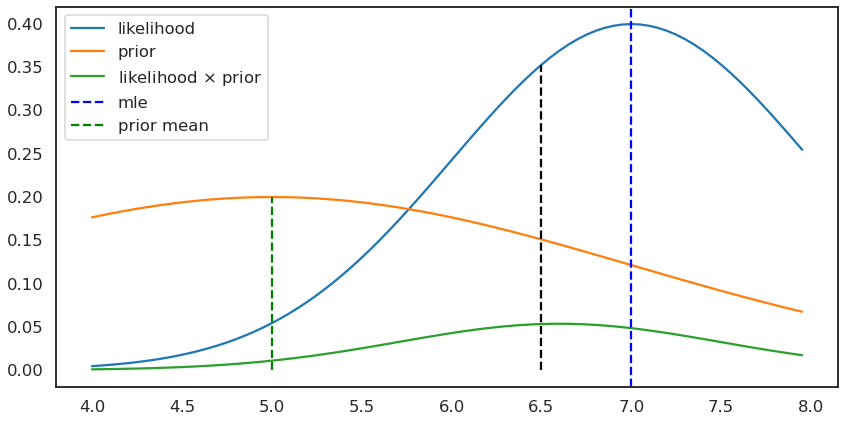

In [2]:
# observed data
y = 7
# std deviation of y
sigma = 1

# prior hyperparameters
mu_0 = 5
sigma_0 = 2 #(this is our prior on std dev of mu_0)

bayes_guess = 6.5

# gen some data along the support of mu and plot likelihood:

mu_plot = np.arange(4,8,.05)

likelihood = norm(mu_plot,sigma).pdf(y)
prior = norm(mu_0,sigma_0).pdf(mu_plot)

plt.figure(figsize=(14,7))
plt.plot(mu_plot,likelihood,label='likelihood')
plt.plot(mu_plot,prior,label='prior')
plt.plot(mu_plot,likelihood*prior,label='likelihood $\\times$ prior')

# plot the mle estimate
plt.axvline(7,c='b',linestyle='--', label='mle')
plt.plot([5,5],[0,norm(mu_0,sigma_0).pdf(mu_0)],c='g',linestyle='--', label='prior mean')
plt.plot([bayes_guess,bayes_guess],[0,norm(bayes_guess,sigma).pdf(y)],c='k',linestyle='--')
plt.legend(loc='upper left')
plt.show()

# Approaches for using the posterior

1. Analytically solving it (Analytical Bayes and Conjugate Priors)
2. Taking random draws of $\theta$ from the posterior distribution using simulation (Monte Carlo Markov Chains, Gibbs Sampling): What we will be using.

## Analytical Bayes

For many years (prior to approximately 1990), these properties were used to derive the posterior **analytically**, since simulation methods were in their infancy and computers were only just gaining sufficient capability for simulation methods such as Monte Carlo Markov Chains.  

In the analytical Bayes approach the focus on the research was to write down forms for $Prob(\mathbf{y}|\theta,\mathbf{x})$ and $Prob(\theta|\mathbf{x}))$ allowing for closed form solutions for the posterior distribution of our parameters.  These approaches required alot of creativity for selecting models and corresponding statistical distributions but limited the analyst to a relatively small universe of models (e.g. simple OLS).  Since most of us don't enjoy these types of mental gymnastics, Bayesian Statistics wasn't widely adopted.  Currently, they are generally out of favor- even these simple models are often now estimated using sampling methods described below.

### Conjugate Priors

To think about applying Bayesian to a very simple model using analytical Bayes, we need to specify the distribution for the likelihood and the prior.  Choosing **conjugate distributions** ensures that we can find closed for solutions for our model parameters (referred to as **MAP**, or Maximum a Posteriori estimates for $\theta$).  For example, assume
$$
Prob(\mathbf{x}|\mu) = \prod_{i=1}^N \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(y_i - \mu)^2}{2\sigma^2}}
$$

Consider the case of known and fixed variance of x (denoted as $\sigma^2$).

__Conjugate Prior__

A natural choice is a normal with mean $\mu_0$ and $\sigma_0^2$ (describing our prior beliefs about the mean of x):

$$
P(\mu) = \frac{1}{\sqrt{2\pi\sigma_0^2}} e^{-\frac{(\mu - \mu_0)^2}{2\sigma_0^2}}
$$

So in this problem, we have

| Parameter | Parameter Type |
|:-----------:|----------------|
|$\mu$        | Model Parameter for mean of $\mathbf{y}$ (What we are trying to Estimate) |
|$\sigma^2$   | Variance of $\mathbf{y}$ (assumed known)
|$\mu_0$      | Hyper-parameter (Describing priors on $\mu$) |
|$\sigma^2_0$ | Hyper-parameter (Describing priors on $\mu$) | 

We call our choice of prior- a conjugate prior- because we have carefully chosen a set of probability forms allowing us to derive close formed solutions for $\mu$.  [More on this here](https://en.wikipedia.org/wiki/Conjugate_prior).

Our posterior distribution is
$$
Prob(\mu|\mathbf{y}) \propto Prob(\mathbf{y}|\mu)Prob(\mathbf{\mu})
$$


Given our conjugate prior and the likelihood function, the **MAP** estimate for our mean conditional on x is 

$$
E(\mu|x_i) = \frac{\sigma^2_0}{\sigma^2 + \sigma^2_0}y_i + \frac{\sigma^2}{\sigma^2 + \sigma^2_0} \mu_0 
$$

Or, for our entire sample, we have
$$
E(\mu|\mathbf{x}) = \frac{\sigma_0^2}{\frac{\sigma^2}{n} + \sigma^2_0}\frac{\sum y_i}{n} + \frac{\frac{\sigma^2}{n}}{\frac{\sigma^2}{n} + \sigma^2_0} \mu_0 
$$

This is an extremely intuitive result, it is simply a weighted average between our prior belief about $\mu$ and the maximum likelihood estimate.  This weight depends on the relative uncertainty across the two measures. As the variance of our prior beliefs get larger, the MAP estimate for $\mu$ places **more** weight on the MLE estimator rather than our priors.  MLE estimates with low precision, relative to our priors, are downweighted.

The posterior distribution, $Prob(\theta|\mathbf{x})$, can then be solved analytically and is distributed as:

$$
N \left (\frac{\sigma_0^2}{\frac{\sigma^2}{n} + \sigma^2_0}\frac{\sum y_i}{n} + \frac{\sigma^2/n}{\frac{\sigma^2}{n} + \sigma^2_0} \mu_0,\left ( {\frac{1}{\sigma_0^2} + \frac{n}{\sigma^2}} \right )^{-1} \right ) 
$$

Let's visualize this in code:

In [3]:
def calc_posterior_analytical(data, x, sigma, mu_0, sigma_0):
    n = data.shape[0]
    # posterior parameter
    mu_post = ( mu_0/(sigma_0**2) + data.sum()/(sigma**2) )*(1. / sigma_0**2 + n / sigma**2)**(-1)
    sigma_post = np.sqrt((1. / sigma_0**2 + n / sigma**2)**(-1))
    # probabilities
    posterior = norm(mu_post,sigma_post).pdf(x)
    prior = norm(mu_0,sigma_0).pdf(x)
    return posterior,prior,mu_post,sigma_post 

def calc_like(mu_trial,sigma,data):
    like = np.zeros(mu_trial.shape[0])
    count = 0
    for i in mu_trial:
        like[count] = norm(i,sigma).pdf(data).prod()
        count += 1
    return like

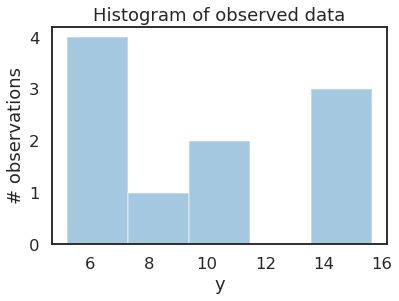

In [4]:
data = norm(10,3).rvs(10)
ax = plt.subplot()
sbn.distplot(data, kde=False, ax=ax,bins=5)
_ = ax.set(title='Histogram of observed data', xlabel='y', ylabel='# observations');

In [5]:
sigma = 3          # Note this the KNOWN std dev of y
mu_prior = 8
sigma_prior = 2  # Note this is our prior on the std of mu

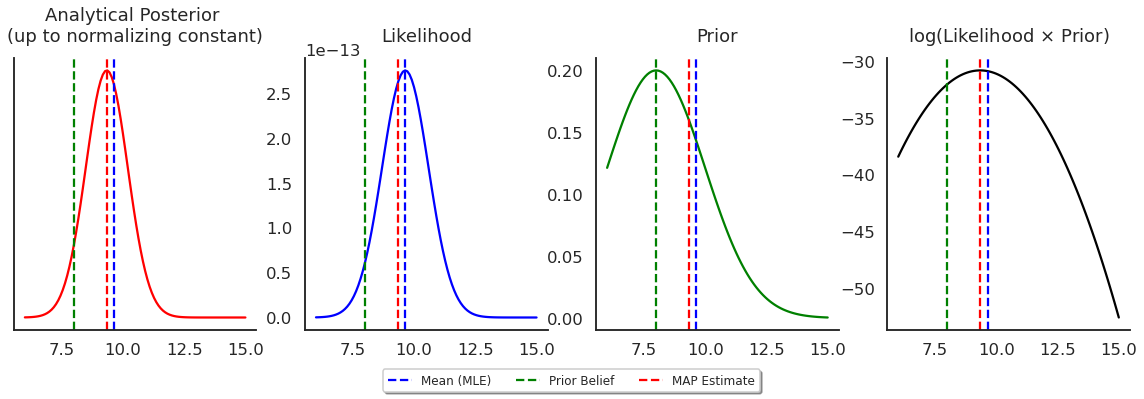

In [16]:
mu_trial = np.linspace(6, 15, 100)

plt.figure(figsize=(20,5))
ax1 = plt.subplot(141)
ax1.set_title('Analytical Posterior \n(up to normalizing constant)', y=1.04)
posterior, prior,mu_post,sigma_post = calc_posterior_analytical(data, mu_trial, sigma, mu_prior, sigma_prior)

ax1.plot(mu_trial, posterior,c='r')

# plot prior,mle, and posterior on x-axis
MLE_opt = data.sum()/len(data) #MLE estimate is the mean

ax1.axvline(MLE_opt,c='b',linestyle='--',label='Mean (MLE)')
ax1.axvline(mu_prior,c='g',linestyle='--',label='Prior Belief')
ax1.axvline(mu_post,c='r',linestyle='--',label='MAP Estimate')
ax1.axes.get_yaxis().set_ticks([])

ax2 = plt.subplot(1,4,2)
ax2.set_title('Likelihood', y=1.04)
like = calc_like(mu_trial,sigma,data)
ax2.plot(mu_trial,like,c='b')
ax2.axvline(MLE_opt,c='b',linestyle='--',label='Mean (MLE)')
ax2.axvline(mu_prior,c='g',linestyle='--',label='Prior Belief')
ax2.axvline(mu_post,c='r',linestyle='--',label='MAP Estimate')


ax3 = plt.subplot(1,4,3)
ax3.set_title('Prior', y=1.04)
ax3.plot(mu_trial,prior,c='g',label='Prior')
ax3.axvline(MLE_opt,c='b',linestyle='--',label='Mean (MLE)')
ax3.axvline(mu_prior,c='g',linestyle='--',label='Prior Belief')
ax3.axvline(mu_post,c='r',linestyle='--',label='MAP Estimate')

# sanity check: plot ln(like) + ln(prior) and check that map estimate is at max

ax4 = plt.subplot(1,4,4)
ax4.set_title('log(Likelihood $\\times$ Prior)', y=1.04)
like = calc_like(mu_trial,sigma,data)
ax4.plot(mu_trial,(np.log(like)+np.log(prior)),c='k')
ax4.axvline(MLE_opt,c='b',linestyle='--',label='Mean (MLE)')
ax4.axvline(mu_prior,c='g',linestyle='--',label='Prior Belief')
ax4.axvline(mu_post,c='r',linestyle='--',label='MAP Estimate')

ax2.legend(loc='lower right', bbox_to_anchor=(1.9, -.25),
          ncol=4, fancybox=True, shadow=True,fontsize=12)


sbn.despine()
plt.show()